In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터프레임 합치기
- 두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 만든다.

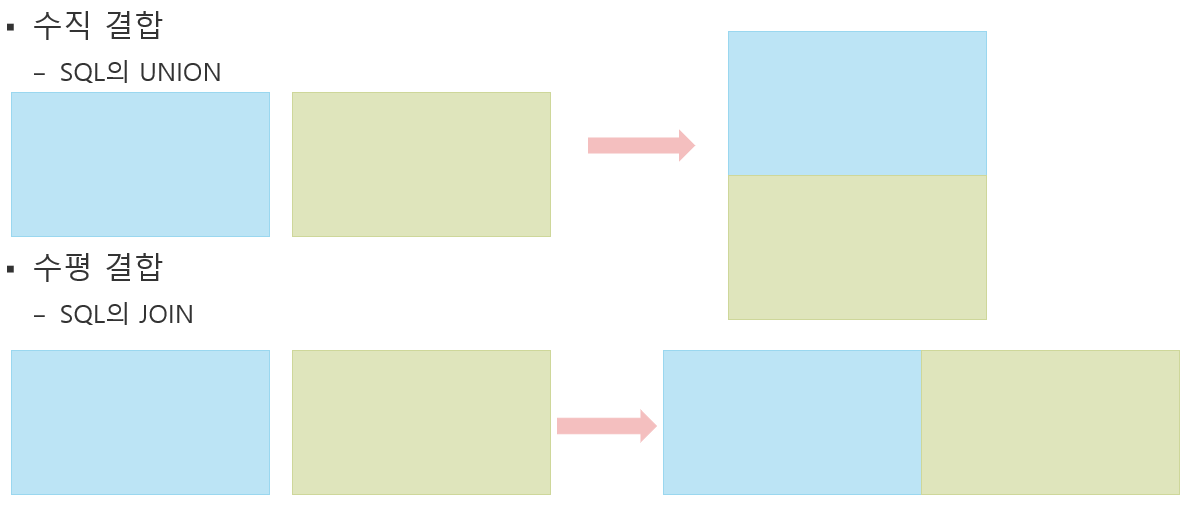

## 데이터셋 읽기
- stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
- stocks_info.csv : 주식 정보

In [5]:
txts = ['2016', '2017', '2018', 'info']
s_2016, s_2017, s_2018, s_info = [pd.read_csv(f'data/stocks_{txt}.csv') for txt in txts]

In [6]:
s_2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [7]:
s_2017

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [8]:
s_2018

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [9]:
s_info

,Symbol,Name
0,AAPL,Apple Inc
1,TSLA,Tesla Inc
2,WMT,Walmart Inc
3,GE,General Electric
4,IBM,IBM(International Business Machines Co)
5,SLB,Schlumberger Limited.
6,TXN,Texas Instruments Incorporated
7,AMZN,"Amazon.com, Inc"


## concat() 이용
- 수직, 조인을 이용한 수평 결합 모두 지원한다.
- 조인(수평결함)의 경우 full outer join과 inner join을 지원한다.
    - full outer join이 기본 방식
    - 조인 기준: index가 같은 행 끼리 합친다. (equi-join)
- pd.concat(objs,  [, key=리스트]), axis=0, join='outer' )
    - 매개변수
        - objs: 합칠 DataFrame들을 **리스트로** 전달
        - keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        - axis
            - 0 또는 index : 수직결합
            - 1 또는 columns : 수평결합
        - join: 
            - 조인방식
            - 'outer'(기본값) 또는 'inner'

> ### 조인(join)
> - 여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> - 두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> - Inner Join, Left Outer Join, Right Outer Join, Full Outer Join

In [10]:
result = pd.concat([s_2016, s_2017, s_2018])
result

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [11]:
result.loc[0]  # result의 index가 3개 각각이 그대로 붙어버려서 이런 상황이 발생할 수 있다.

,Symbol,Shares,Low,High
0,AAPL,80,95,110
0,AAPL,50,120,140
0,AAPL,40,135,170


In [12]:
# 수직으로 합칠 때 index는 합치지 않는 방법. - 개별 DataFrame의 index가 단순 순번일 경우
result = pd.concat([s_2016, s_2017, s_2018], ignore_index = True)
result

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
3,AAPL,50,120,140
4,GE,100,30,40
5,IBM,87,75,95
6,SLB,20,55,85
7,TXN,500,15,23
8,TSLA,100,100,300
9,AAPL,40,135,170


In [13]:
# key를 지정하면 각각의 DataFrame을 구별할 수 있도록 multi-index로 index를 구성
result = pd.concat([s_2016, s_2017, s_2018], keys = [2016, 2017, 2018])
result

Symbol  Shares  Low  High
2016 0   AAPL      80   95   110
     1   TSLA      50   80   130
     2    WMT      40   55    70
2017 0   AAPL      50  120   140
     1     GE     100   30    40
     2    IBM      87   75    95
     3    SLB      20   55    85
     4    TXN     500   15    23
     5   TSLA     100  100   300
2018 0   AAPL      40  135   170
     1   AMZN       8  900  1125
     2   TSLA      50  220   400

In [17]:
result.loc[2016, 0]  # multi-index
result.loc[2017, 0]

Symbol    AAPL
Shares      50
Low        120
High       140
Name: (2017, 0), dtype: object

In [18]:
# 수평 결합 (join)
# join 연산. s_2016.index = s_2017.index : outer join
result = pd.concat([s_2016, s_2017], axis = 1)
result

,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140
1,TSLA,50.0,80.0,130.0,GE,100,30,40
2,WMT,40.0,55.0,70.0,IBM,87,75,95
3,NaN,NaN,NaN,NaN,SLB,20,55,85
4,NaN,NaN,NaN,NaN,TXN,500,15,23
5,NaN,NaN,NaN,NaN,TSLA,100,100,300


In [19]:
result = pd.concat([s_2016, s_2017], axis = 1, join = 'inner')  # inner join : index가 같은 애들끼리만 붙여라
result

,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80,95,110,AAPL,50,120,140
1,TSLA,50,80,130,GE,100,30,40
2,WMT,40,55,70,IBM,87,75,95


In [27]:
# set_index('Symbol')을 통해 각 DataFrame의 index를 Symbol로 맞춰주어 행을 통일시킨다.
result = pd.concat([s_2017.set_index('Symbol'), s_info.set_index('Symbol')], 
                   axis = 1, 
                   join = 'inner')
result

,Shares,Low,High,Name
Symbol,,,,
AAPL,50,120,140,Apple Inc
GE,100,30,40,General Electric
IBM,87,75,95,IBM(International Business Machines Co)
SLB,20,55,85,Schlumberger Limited.
TXN,500,15,23,Texas Instruments Incorporated
TSLA,100,100,300,Tesla Inc


## 조인을 통한 DataFrame 합치기
- join()
    - 2개 이상의 DataFrame을 조인할 때 사용
- merge()
    - 2개의 DataFrame의 조인만 지원

### join()
- dataframe객체.join(others, how='left', lsuffix='', rsuffix='') 
- `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
- 두개 이상의 DataFrame들을 조인 할 수 있다.
    - **조인 기준**: index가 같은 값인 행끼리 합친다. (equi-join)
    - **조인 기본 방식**: Left Outer Join
- 매개변수
    - lsuffix, rsuffix 저
        - 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 발생.
        - 같은 이름이 있는 경우 붙일 접미어 지정
    - how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본
        

In [28]:
s_2016.join(s_2017)  # 'Symbol', 'Shares', 'Low', 'High' 컬럼이 오버랩되었다는 에러
# -> 컬럼명이 중복되면 join은 오류가 발생한다.

ValueError: columns overlap but no suffix specified: Index(['Symbol', 'Shares', 'Low', 'High'], dtype='object')

In [30]:
s_2016.join(s_2017, lsuffix = '_2016', rsuffix = '_2017')  # 컬럼명이 중복되지 않도록 하는 방법

,Symbol_2016,Shares_2016,Low_2016,High_2016,Symbol_2017,Shares_2017,Low_2017,High_2017
0,AAPL,80,95,110,AAPL,50,120,140
1,TSLA,50,80,130,GE,100,30,40
2,WMT,40,55,70,IBM,87,75,95


In [31]:
s_2017.join(s_2016, lsuffix = '_2017', rsuffix = '_2016')

,Symbol_2017,Shares_2017,Low_2017,High_2017,Symbol_2016,Shares_2016,Low_2016,High_2016
0,AAPL,50,120,140,AAPL,80.0,95.0,110.0
1,GE,100,30,40,TSLA,50.0,80.0,130.0
2,IBM,87,75,95,WMT,40.0,55.0,70.0
3,SLB,20,55,85,NaN,NaN,NaN,NaN
4,TXN,500,15,23,NaN,NaN,NaN,NaN
5,TSLA,100,100,300,NaN,NaN,NaN,NaN


In [35]:
# 컬럼명에 suffix(접미어)를 붙인다. (원본은 바뀌지 않음)
s_2017.add_suffix('_2017')

,Symbol_2017,Shares_2017,Low_2017,High_2017
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [36]:
# join(others): others에 DataFrame들의 List를 전달하는 경우 (여러개 조인) right join은 안된다.
s_2017.add_suffix('_2017').join([
    s_2016.add_suffix('_2016'),
    s_2018.add_suffix('_2018'),
    s_info.add_suffix('_info')
])

,Symbol_2017,Shares_2017,Low_2017,High_2017,Symbol_2016,Shares_2016,Low_2016,High_2016,Symbol_2018,Shares_2018,Low_2018,High_2018,Symbol_info,Name_info
0,AAPL,50.0,120.0,140.0,AAPL,80.0,95.0,110.0,AAPL,40.0,135.0,170.0,AAPL,Apple Inc
1,GE,100.0,30.0,40.0,TSLA,50.0,80.0,130.0,AMZN,8.0,900.0,1125.0,TSLA,Tesla Inc
2,IBM,87.0,75.0,95.0,WMT,40.0,55.0,70.0,TSLA,50.0,220.0,400.0,WMT,Walmart Inc
3,SLB,20.0,55.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GE,General Electric
4,TXN,500.0,15.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBM,IBM(International Business Machines Co)
5,TSLA,100.0,100.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLB,Schlumberger Limited.


In [38]:
s_2018.join(s_info, lsuffix = '_2018', rsuffix = '_info')

,Symbol_2018,Shares,Low,High,Symbol_info,Name
0,AAPL,40,135,170,AAPL,Apple Inc
1,AMZN,8,900,1125,TSLA,Tesla Inc
2,TSLA,50,220,400,WMT,Walmart Inc


In [39]:
s_2018.set_index('Symbol').join(s_info.set_index('Symbol'))

,Shares,Low,High,Name
Symbol,,,,
AAPL,40,135,170,Apple Inc
AMZN,8,900,1125,"Amazon.com, Inc"
TSLA,50,220,400,Tesla Inc


In [45]:
s_2018_copy = s_2018.append({'Symbol':'AAA', 'Shares':5, 'Low':100, 'High':120}, ignore_index = True)
s_2018_copy

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400
3,AAA,5,100,120


In [46]:
s_info.set_index('Symbol').join(s_2018_copy.set_index('Symbol'), how = 'right')
s_info.set_index('Symbol').join(s_2018_copy.set_index('Symbol'), how = 'left')
s_info.set_index('Symbol').join(s_2018_copy.set_index('Symbol'), how = 'outer')  # full outer join
s_info.set_index('Symbol').join(s_2018_copy.set_index('Symbol'), how = 'inner')

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,40,135,170
TSLA,Tesla Inc,50,220,400
AMZN,"Amazon.com, Inc",8,900,1125


### merge()
- `df_a.merge(df_b)`
- 두개의 DataFrame 조인만 지원
    - **조인 기준**: 같은 컬럼명을 기준으로 equi-join이 기본. **조인기준을 다양하게 정할 수 있다.**
    - **조인 기본 방식**: inner join
- `dataframe.merge(합칠dataframe, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)`  
- 매개변수
    - on : 같은 컬럼명이 여러개일때 join 대상 컬럼을 선택
    - right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명. (쓸거면 둘다 쓰고, 안쓸거면 둘다 안씀 - right_index, left_index와 혼합 사용이 가능)
    - left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정 
    - how : 조인 방식.  'left', 'right', 'outer', 'inner'. 기본: inner 
    - suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        - 생략시 x, y를 붙인다.       

In [49]:
s_2016.merge(s_2017)
# join 방식이 inner join이 default
# 기준: 동일한 컬럼
# -> Symbol, Shares, Low, High가 모두 같은 애들끼리 합치므로 결과가 나오지 않는다. (그런 애들이 없기 때문)

,Symbol,Shares,Low,High


In [50]:
s_2016.merge(s_2018, on = 'Symbol')  # Symbol이 같은 애들끼리 join해라

,Symbol,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


In [51]:
s_2016.merge(s_2018, on = 'Symbol', suffixes = ['_2016', '_2018'])  # suffixes를 통해 둘다 접미어를 설정

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2018,Low_2018,High_2018
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


In [52]:
s_2018_copy = s_2018.set_index('Symbol')#, inplace = True)
s_2018_copy

,Shares,Low,High
Symbol,,,
AAPL,40,135,170
AMZN,8,900,1125
TSLA,50,220,400


In [55]:
s_info.merge(s_2018_copy, left_on = 'Symbol', right_index = True)  # s_info의 Symbol과 s_2018의 index를 합쳐라

,Symbol,Name,Shares,Low,High
0,AAPL,Apple Inc,40,135,170
1,TSLA,Tesla Inc,50,220,400
7,AMZN,"Amazon.com, Inc",8,900,1125


In [59]:
s_2017_copy = s_2017.rename({'Symbol':'Code'}, axis = 1)
s_2017_copy

,Code,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [62]:
s_info.merge(s_2017_copy, left_on = 'Symbol', right_on = 'Code')

,Symbol,Name,Code,Shares,Low,High
0,AAPL,Apple Inc,AAPL,50,120,140
1,TSLA,Tesla Inc,TSLA,100,100,300
2,GE,General Electric,GE,100,30,40
3,IBM,IBM(International Business Machines Co),IBM,87,75,95
4,SLB,Schlumberger Limited.,SLB,20,55,85
5,TXN,Texas Instruments Incorporated,TXN,500,15,23


- 수직으로 합치는 경우(Union) : concat() 사용
- 두개 **이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
- 두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편하다.

# TODO

In [2]:
# TODO 1 data/customer.csv, data/order.csv, data/qna.csv 를 DataFrame으로 읽으시오.
cust = pd.read_csv('data/customer.csv')
order = pd.read_csv('data/order.csv')
qna = pd.read_csv('data/qna.csv')

In [3]:
# TODO 2 TODO1에서 읽은 세개의 데이터셋의 정보를 확인하세요.
cust.info(), print('*'*50), order.info(), print('*'*50), qna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5 non-null      object
 1   name    5 non-null      object
 2   age     5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     6 non-null      int64 
 1   cust_id      6 non-null      object
 2   total_price  6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   qna_no   3 non-null     

(None, None, None, None, None)

In [4]:
# TODO 3 customer DataFrame과 order DataFrame을 고객정보는 모두 나오도록 join 하세요.
cust.merge(order, right_on = 'cust_id', left_on = 'id', how = 'left')

,id,name,age,order_id,cust_id,total_price
0,id-1,김영수,33,1.0,id-1,100000.0
1,id-1,김영수,33,2.0,id-1,250000.0
2,id-2,박선영,23,3.0,id-2,300000.0
3,id-2,박선영,23,4.0,id-2,15000.0
4,id-2,박선영,23,5.0,id-2,51000.0
5,id-3,오정현,21,NaN,NaN,NaN
6,id-4,박명수,40,6.0,id-4,32000.0
7,id-5,이철기,17,NaN,NaN,NaN


In [5]:
# TODO 4 customer DataFrame의 index를 id컬럼으로 변경.
cust2 = cust.set_index('id')
cust2

,name,age
id,,
id-1,김영수,33
id-2,박선영,23
id-3,오정현,21
id-4,박명수,40
id-5,이철기,17


In [6]:
# TODO 5 customer DataFrame과 qna DataFrame을 inner join 하세요.
cust2.merge(qna, right_on = 'cust_id', left_index = True, how = 'inner')

,name,age,qna_no,cust_id,txt
0,박명수,40,1,id-4,물건있나요?
1,박명수,40,2,id-4,얼마에요
2,이철기,17,3,id-5,반품은 어떻게 해요?


In [14]:
# TODO 6. 세개의 DataFrame을 고객정보는 모두 나오도록 join 하세요.
cust2.join([order.set_index('cust_id'), qna.set_index('cust_id')])

,name,age,order_id,total_price,qna_no,txt
id-1,김영수,33,1.0,100000.0,NaN,NaN
id-1,김영수,33,2.0,250000.0,NaN,NaN
id-2,박선영,23,3.0,300000.0,NaN,NaN
id-2,박선영,23,4.0,15000.0,NaN,NaN
id-2,박선영,23,5.0,51000.0,NaN,NaN
id-3,오정현,21,NaN,NaN,NaN,NaN
id-4,박명수,40,6.0,32000.0,1.0,물건있나요?
id-4,박명수,40,6.0,32000.0,2.0,얼마에요
id-5,이철기,17,NaN,NaN,3.0,반품은 어떻게 해요?
